In [1]:
import pandas as pd
import gzip
import time
# Install a few python packages using pip
from common import utils
utils.require_package('nltk')
utils.require_package("wget")      # for fetching dataset

In [2]:
# Standard python helper libraries.
from __future__ import print_function
from __future__ import division
import os, sys, time
import collections
import itertools

# Numerical manipulation libraries.
import numpy as np

#Visualization
import matplotlib
%matplotlib inline

# NLTK is the Natural Language Toolkit, and contains several language datasets
# as well as implementations of many popular NLP algorithms.
# HINT: You should look at what is available here when thinking about your project!
import nltk

In [3]:
def parse(path):
  print('start parse')
  start_parse = time.time()
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)
  end_parse = time.time()
  print('end parse with time for parse',end_parse - start_parse)

def getDF(path):
  print('start getDF')
  start = time.time()
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  print('end getDF')
  end = time.time()
  print('time taken to load data = ',end-start)
  return pd.DataFrame.from_dict(df, orient='index')
df = getDF('reviews_Toys_and_Games.json.gz')

start getDF
start parse
end parse with time for parse 111.71492290496826
end getDF
time taken to load data =  111.71538734436035


In [4]:
print(df.shape)
print(df.columns)
df.head(10)

(2252771, 9)
Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AMEVO2LY6VEJA,0000191639,Nicole Soeder,"[0, 0]","Great product, thank you! Our son loved the pu...",5.0,Puzzles,1388016000,"12 26, 2013"
1,A3C9CSW3TJITGT,0005069491,Renee,"[0, 0]",I love these felt nursery rhyme characters and...,4.0,Charming characters but busy work required,1377561600,"08 27, 2013"
2,A31POTIYCKSZ9G,0076561046,So CA Teacher,"[0, 0]",I see no directions for its use. Therefore I h...,3.0,No directions for use...,1404864000,"07 9, 2014"
3,A2GGHHME9B6W4O,0131358936,Dalilah G.,"[0, 0]",This is a great tool for any teacher using the...,5.0,Great CD-ROM,1382400000,"10 22, 2013"
4,A1FSLDH43ORWZP,0133642984,Dayna English,"[0, 0]",Although not as streamlined as the Algebra I m...,5.0,Algebra II -- presentation materials,1374278400,"07 20, 2013"
5,A3NXHTSEBX9YHB,0279515766,marlenetbueras,"[0, 0]",i am glad to get it after 25 yr of waiting for...,5.0,my strawberry shortcake,1363564800,"03 18, 2013"
6,AYVR1MQCTNU5D,0375829695,annie,"[0, 0]",What a great theme for a puzzle book. My daugh...,5.0,So cute!!,1291939200,"12 10, 2010"
7,A3CJHKFHHQJP2K,0375829695,"Beth Sharo ""bookmom""","[0, 0]",My son got this book for his birthday. He lov...,1.0,Disappointing Puzzle Book,1297209600,"02 9, 2011"
8,A3638FINP26E8N,0375829695,C. Boykin,"[1, 1]",Love the book format. My 4yr old grandson love...,3.0,frustrating puzzle pieces,1282521600,"08 23, 2010"
9,AUT7723O49VMN,0375829695,Cindy Lindy,"[1, 1]",I'm a 2nd grade teacher. My students found th...,4.0,challenging and fun,1237766400,"03 23, 2009"


In [5]:
print(df.groupby('overall').count())

         reviewerID     asin  reviewerName  helpful  reviewText  summary  \
overall                                                                    
1.0          192993   192993        192435   192993      192993   192993   
2.0          115801   115801        115416   115801      115801   115801   
3.0          193941   193941        193195   193941      193941   193941   
4.0          407884   407884        406255   407884      407884   407884   
5.0         1342152  1342152       1333623  1342152     1342152  1342152   

         unixReviewTime  reviewTime  
overall                              
1.0              192993      192993  
2.0              115801      115801  
3.0              193941      193941  
4.0              407884      407884  
5.0             1342152     1342152  


In [6]:
for i in range(10):
    print(df['reviewerID'].iloc[i])
    print(df['reviewText'].iloc[i])

AMEVO2LY6VEJA
Great product, thank you! Our son loved the puzzles.  They have large pieces yet they are still challenging for a 4 year old.
A3C9CSW3TJITGT
I love these felt nursery rhyme characters and scenes.  The quality of the felt is good, and the illustrations are detailed and pretty.  As noted, the figures and scenes are printed on 2 large sheets of flannel and each individual item needs to be cut out.  This process took me 2 hours of tiny cutting.  To me it does not lend itself to a book form but rather laying out the scenes separately or for use on a flannel board.  However, I love the quiet play it offers for my toddler, and as a former Kindergarten teacher, I understand the value of learning rhyme and its connection to future reading.  Overall, delightful product with some work involved.
A31POTIYCKSZ9G
I see no directions for its use. Therefore I have to make up the games, unfortunately.
A2GGHHME9B6W4O
This is a great tool for any teacher using the Pre Calculus Enhanced with 

In [7]:
#Number of reviews by product
cntByProduct = df[['asin','reviewText']].groupby('asin').agg('count')

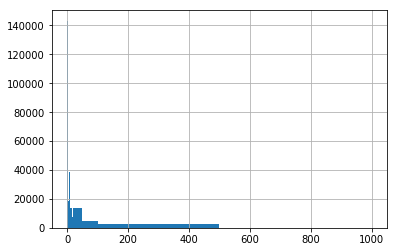

In [8]:
cntByProduct['reviewText'].hist(bins = [0,1,2,3,4,5,10,15,20,50,100,500,1000])

In [9]:
#Number of products
cntByProduct.shape

(327698, 1)

In [10]:
#counts of products with minimum number of reviews, and corresponding count of reviews
for i in range(10):
    print("Number of products with more than",i,'reviews:',cntByProduct[cntByProduct['reviewText'] > i].shape[0])
    print("total number of rows:",cntByProduct[cntByProduct['reviewText'] > i]['reviewText'].sum())

Number of products with more than 0 reviews: 327698
total number of rows: 2252771
Number of products with more than 1 reviews: 184426
total number of rows: 2109499
Number of products with more than 2 reviews: 128788
total number of rows: 1998223
Number of products with more than 3 reviews: 99428
total number of rows: 1910143
Number of products with more than 4 reviews: 81232
total number of rows: 1837359
Number of products with more than 5 reviews: 68782
total number of rows: 1775109
Number of products with more than 6 reviews: 59645
total number of rows: 1720287
Number of products with more than 7 reviews: 52626
total number of rows: 1671154
Number of products with more than 8 reviews: 47011
total number of rows: 1626234
Number of products with more than 9 reviews: 42458
total number of rows: 1585257


In [11]:
#Pulling out a dataframe of products with at least 5 reviews
df5 = df[df['asin'].isin(cntByProduct[cntByProduct['reviewText'] >= 5].index.tolist())]
print(df5.shape)

(1837359, 9)


In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [25]:
# One of these needs to be downloaded for pos to work
nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_treebank_pos_tagger')

# This needed to be downloaded for lemmatizer. There may be other options - have not explored yet.
nltk.download("WordNet")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Arunima\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
df5.head(15)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
6,AYVR1MQCTNU5D,0375829695,annie,"[0, 0]",What a great theme for a puzzle book. My daugh...,5.0,So cute!!,1291939200,"12 10, 2010"
7,A3CJHKFHHQJP2K,0375829695,"Beth Sharo ""bookmom""","[0, 0]",My son got this book for his birthday. He lov...,1.0,Disappointing Puzzle Book,1297209600,"02 9, 2011"
8,A3638FINP26E8N,0375829695,C. Boykin,"[1, 1]",Love the book format. My 4yr old grandson love...,3.0,frustrating puzzle pieces,1282521600,"08 23, 2010"
9,AUT7723O49VMN,0375829695,Cindy Lindy,"[1, 1]",I'm a 2nd grade teacher. My students found th...,4.0,challenging and fun,1237766400,"03 23, 2009"
10,A27GZ92KLXDJVJ,0375829695,D. Glade,"[1, 1]",This puzzle is poorly made. The picture part ...,2.0,Cheaply made puzzle - not worth your $!,1264550400,"01 27, 2010"
11,A1QG5NJW3LOTSO,0375829695,H. Chao,"[0, 0]",On the plus side - puzzle book format and deli...,3.0,mixed feelings,1201564800,"01 29, 2008"
12,A2R5OO04DXXGZ2,0375829695,Jack Bowdoin,"[0, 0]",Nephew and Niece loved these! Highly recommend...,5.0,Great Puzzle!,1354665600,"12 5, 2012"
13,A11TL78PNBS336,0375829695,"L. Vickers ""lcvickers""","[0, 0]","If you have a child who loves Dr. Suess, and l...",4.0,Big book of puzzles!,1292198400,"12 13, 2010"
14,A2WR3MP7IGOFBO,0375829695,M. Jimenez,"[0, 0]",Very cute. I liked that each of the puzzle fra...,5.0,Cute,1399852800,"05 12, 2014"
19,A2BK2H5ZEB4H2Z,0439028485,Alicia Pearson,"[0, 0]","Bought this form my nephew age 2, He loved cli...",4.0,Clifford stacking blocks,1324425600,"12 21, 2011"


In [15]:
#Trial of using pos_tag on one specific review

review = df5.loc[7,'reviewText']
print(review)
tags = nltk.pos_tag(word_tokenize(review))
print(tags)

print('Printing all adjectives')
for i,pair in enumerate(tags):
    if pair[1] == 'JJ':
        print('adjective:',pair[0])
        
        #Can we find the noun corresponding to the adjective assuming the noun came after the adjective
        if ('NN' in tags[i+1][1]):
            print('corresponding noun:',tags[i+1][0])
        
        
print('\nPrinting all nouns')
for word,tag in tags:
    if ('NN' in tag):
        print(word)

My son got this book for his birthday.  He loves puzzles and Dr. Seuss and I felt that this would be a winning combination.  The pieces are all the same shape and can easily be put together in the wrong place.  I worked with him to complete the puzzle and found it frustrating as an adult.  I would not recommend this book to anyone.
[('My', 'PRP$'), ('son', 'NN'), ('got', 'VBD'), ('this', 'DT'), ('book', 'NN'), ('for', 'IN'), ('his', 'PRP$'), ('birthday', 'NN'), ('.', '.'), ('He', 'PRP'), ('loves', 'VBZ'), ('puzzles', 'NNS'), ('and', 'CC'), ('Dr.', 'NNP'), ('Seuss', 'NNP'), ('and', 'CC'), ('I', 'PRP'), ('felt', 'VBD'), ('that', 'IN'), ('this', 'DT'), ('would', 'MD'), ('be', 'VB'), ('a', 'DT'), ('winning', 'JJ'), ('combination', 'NN'), ('.', '.'), ('The', 'DT'), ('pieces', 'NNS'), ('are', 'VBP'), ('all', 'PDT'), ('the', 'DT'), ('same', 'JJ'), ('shape', 'NN'), ('and', 'CC'), ('can', 'MD'), ('easily', 'RB'), ('be', 'VB'), ('put', 'VBN'), ('together', 'RB'), ('in', 'IN'), ('the', 'DT'), ('w

In [16]:
# Stemming vs Lemmatizing
#Sample comparing the output of the two

from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
ps = PorterStemmer()
stemmedReview = []
lemmedReview = []
review = df.loc[6,'reviewText']
for word in word_tokenize(review):
    stemmedReview.append(ps.stem(word))
    lemmedReview.append(lem.lemmatize(word,"v"))
print('Original review \n', review)
print('Stemmed review \n',stemmedReview)
print('Lemmatized review \n',lemmedReview)

# Lemmatizing works better in keeping the sense of the word.

Original review 
 What a great theme for a puzzle book. My daughter loves both Dr. Seuss AND puzzle books, so this was a hit!
Stemmed review 
 ['what', 'a', 'great', 'theme', 'for', 'a', 'puzzl', 'book', '.', 'My', 'daughter', 'love', 'both', 'dr.', 'seuss', 'and', 'puzzl', 'book', ',', 'so', 'thi', 'wa', 'a', 'hit', '!']
Lemmatized review 
 ['What', 'a', 'great', 'theme', 'for', 'a', 'puzzle', 'book', '.', 'My', 'daughter', 'love', 'both', 'Dr.', 'Seuss', 'AND', 'puzzle', 'book', ',', 'so', 'this', 'be', 'a', 'hit', '!']


In [17]:
#Create a dataframe for a specific product
df1prod = df[df['asin'] == '0375829695']
df1prod.shape

(9, 9)

In [18]:
# Doing the lemmatizing and pos_tag for all reviews for a product. 
# And then a frequency count of all the words that are nouns and adjectives (this is a semi-informed choice. Can potentially be improved)

goodWords = []
for review in df1prod['reviewText']:
    print(review)
    lem = WordNetLemmatizer()
    lemmedReview = []
    for word in word_tokenize(review):
        lemmedReview.append(lem.lemmatize(word,"v")) # v here is part of speech. The lemmatizer should probably come after the pos_tag, so appropriate pos can be used. 
        #Before we do that, need to map the tags from pos_tag to the tags that lemmatizer takes. TIll then, 'v' is working fine.
    print(lemmedReview)
    
    tags = nltk.pos_tag(lemmedReview)
    print(tags)
    
    print('\nPrinting all nouns and adjectives')
    for word,tag in tags:
        if ('NN' in tag) | ('JJ' in tag): #Using 'NN' in tag allows us to include NN, NNP, NNS - which are some variations of NN.
            print(word)
            goodWords.append(word)
            
    print('Printing all adjectives')
    for i,pair in enumerate(tags):
        if pair[1] == 'JJ':
            print('adjective:',pair[0])
            #Assuming the noun came after the adjective
            if ('NN' in tags[i+1][1]):
                print('corresponding noun:',tags[i+1][0])

What a great theme for a puzzle book. My daughter loves both Dr. Seuss AND puzzle books, so this was a hit!
['What', 'a', 'great', 'theme', 'for', 'a', 'puzzle', 'book', '.', 'My', 'daughter', 'love', 'both', 'Dr.', 'Seuss', 'AND', 'puzzle', 'book', ',', 'so', 'this', 'be', 'a', 'hit', '!']
[('What', 'WP'), ('a', 'DT'), ('great', 'JJ'), ('theme', 'NN'), ('for', 'IN'), ('a', 'DT'), ('puzzle', 'NN'), ('book', 'NN'), ('.', '.'), ('My', 'PRP$'), ('daughter', 'NN'), ('love', 'VB'), ('both', 'DT'), ('Dr.', 'NNP'), ('Seuss', 'NNP'), ('AND', 'NNP'), ('puzzle', 'NN'), ('book', 'NN'), (',', ','), ('so', 'IN'), ('this', 'DT'), ('be', 'VB'), ('a', 'DT'), ('hit', 'NN'), ('!', '.')]

Printing all nouns and adjectives
great
theme
puzzle
book
daughter
Dr.
Seuss
AND
puzzle
book
hit
Printing all adjectives
adjective: great
corresponding noun: theme
My son got this book for his birthday.  He loves puzzles and Dr. Seuss and I felt that this would be a winning combination.  The pieces are all the same shap

In [19]:
#Highest frequency words picked from the reviews

from collections import Counter
a = Counter(goodWords)
a.most_common(10)

[('puzzle', 18),
 ('book', 8),
 ('piece', 7),
 ('Dr.', 6),
 ('Seuss', 6),
 ('same', 3),
 ('children', 3),
 ('picture', 3),
 ('great', 2),
 ('son', 2)]